# 🤖 LightGBM (Light Gradient Boosting Machine)

**best_params = Best Parameters: {'n_estimators': 462, 'max_depth': 8, 'num_leaves': 8, 'learning_rate': 0.09307365282770512, 'min_child_samples': 17, 'reg_alpha': 0.007517979097813751, 'reg_lambda': 7.539307360631893, 'force_col_wise': False}**

In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

'''
Optuna es una biblioteca de optimización de hiperparámetros que se utiliza para encontrar automáticamente los mejores valores 
de hiperparámetros para un modelo de aprendizaje automático. Proporciona métodos para definir espacios de búsqueda de hiperparámetros y 
generar sugerencias de valores dentro de esos espacios.
'''
import optuna 
import lightgbm as lgb
'''
LightGBM es una implementación eficiente y de alto rendimiento de 
Gradient Boosting Machines (GBM), que es una técnica de aprendizaje automático 
basada en ensambles.
LightGBM utiliza un enfoque de aprendizaje por refuerzo (boosting) para crear un
modelo que combina múltiples árboles de decisión débiles para realizar 
predicciones. Cada árbol se construye secuencialmente, donde los árboles 
posteriores se centran en corregir los errores cometidos por los árboles 
anteriores.
'''

'\nLightGBM es una implementación eficiente y de alto rendimiento de \nGradient Boosting Machines (GBM), que es una técnica de aprendizaje automático \nbasada en ensambles.\nLightGBM utiliza un enfoque de aprendizaje por refuerzo (boosting) para crear un\nmodelo que combina múltiples árboles de decisión débiles para realizar \npredicciones. Cada árbol se construye secuencialmente, donde los árboles \nposteriores se centran en corregir los errores cometidos por los árboles \nanteriores.\n'

In [2]:
data= pd.read_csv('../data/data_imputed/data_processed_newdata2.csv')

In [3]:
'''
Seleccionamos todas las filas de 'data' donde el valor de la columna 'x_e_out [-]' no es nulo, y lo almacenamos en un nuevo dataframe 'y_no_null'.
'''
no_null = data[data['x_e_out [-]'].notnull()]
no_null.reset_index(drop=True, inplace=True)
no_null= no_null.drop('id', axis=1)

'''
Seleccionamos todas las filas de 'data' donde el valor de la columna 'x_e_out [-]' es nulo, y lo almacenamos en un nuevo dataframe 'target_null'.
'''
null = data[data['x_e_out [-]'].isnull()]
null.reset_index(drop=True, inplace=True)


In [4]:
# Creamos una copia del DataFrame original
no_null = no_null.copy()

In [5]:
# Variables independientes
X = no_null.drop('x_e_out [-]', axis=1)
# Variable dependiente
y = no_null['x_e_out [-]']

import re 
# Preprocess column names
X.columns = [re.sub(r'[\[\]<>\s]+', '_', col) for col in X.columns]
X.columns

import re 
# Preprocess column names
y = pd.DataFrame(y)
y.columns = [re.sub(r'[\[\]<>\s]+', '_', col) for col in y.columns]
y.columns

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
def objective(trial):
    # Definimos los hiperparámetros a optimizar
    params = {
        'metric': 'RMSE',
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 4, 8),
        'num_leaves': trial.suggest_int('num_leaves', 2, 8),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10),
        'force_col_wise': trial.suggest_categorical('force_col_wise', [True, False]),
        'verbosity': -1
    }
    
    X = no_null.drop('x_e_out [-]', axis=1)
    y = no_null['x_e_out [-]']
    
    import re 
    # Preprocess column names
    X.columns = [re.sub(r'[\[\]<>\s]+', '_', col) for col in X.columns]
    # Preprocess column names
    y = pd.DataFrame(y)
    y.columns = [re.sub(r'[\[\]<>\s]+', '_', col) for col in y.columns]

    # Dividimos los datos en entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Entrenamos el modelo
    model = lgb.LGBMRegressor(**params)
    model.fit(X_train, y_train)
    
    # Predecimos los valores de 'y' para los datos de prueba
    y_pred = model.predict(X_test)
    # Calculamos el rmse
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    
    return rmse

# Creamos el estudio
study_lgbm_rmse = optuna.create_study(direction='minimize')

# Buscamo los mejores hiperparámetros
study_lgbm_rmse.optimize(objective, n_trials=100)

# Mejores hiperparámetros
best_params = study_lgbm_rmse.best_params
best_rmse = study_lgbm_rmse.best_value
print(f"Best Parameters: {best_params}")
print(f"Best RMSE: {best_rmse}")

[I 2023-05-28 21:27:49,572] A new study created in memory with name: no-name-f74687c7-b177-4ad0-9a43-ce700230429f
[I 2023-05-28 21:27:49,719] Trial 0 finished with value: 0.07677525628158345 and parameters: {'n_estimators': 336, 'max_depth': 7, 'num_leaves': 8, 'learning_rate': 0.09074478966158557, 'min_child_samples': 1, 'reg_alpha': 8.367570547119275, 'reg_lambda': 5.1968292709572665, 'force_col_wise': True}. Best is trial 0 with value: 0.07677525628158345.
[I 2023-05-28 21:27:49,850] Trial 1 finished with value: 0.07661763179772081 and parameters: {'n_estimators': 167, 'max_depth': 7, 'num_leaves': 6, 'learning_rate': 0.050538549180544054, 'min_child_samples': 19, 'reg_alpha': 1.384408476523189, 'reg_lambda': 5.679247061151678, 'force_col_wise': False}. Best is trial 1 with value: 0.07661763179772081.
[I 2023-05-28 21:27:50,061] Trial 2 finished with value: 0.0775257435169317 and parameters: {'n_estimators': 368, 'max_depth': 8, 'num_leaves': 5, 'learning_rate': 0.029938913437017378

Best Parameters: {'n_estimators': 462, 'max_depth': 8, 'num_leaves': 8, 'learning_rate': 0.09307365282770512, 'min_child_samples': 17, 'reg_alpha': 0.007517979097813751, 'reg_lambda': 7.539307360631893, 'force_col_wise': False}
Best RMSE: 0.07435608150304959


#### Utilizamos los mejores hiperparámetros para entrenar el modelo LightGBM

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lgbm_model = lgb.LGBMRegressor(**best_params)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

In [8]:
y_pred_lgbm = lgbm_model.predict(X_test)
# Calculamos el RMSE
rmse = mean_squared_error(y_test, y_pred_lgbm, squared=False)
print("RMSE:", rmse)

RMSE: 0.07435608150304959


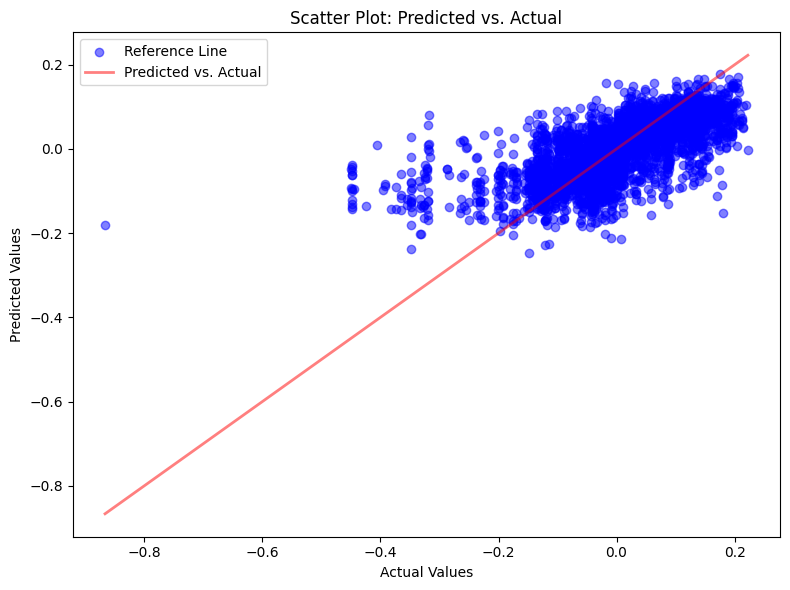

In [9]:

# Scatter plot of actual values vs predicted values
plt.figure(figsize=(8, 6))  # Ajusta el tamaño de la figura según tus necesidades
plt.scatter(y_test, y_pred_lgbm, color='blue', label='Actual', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', alpha=0.5, linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Scatter Plot: Predicted vs. Actual')
plt.legend(['Reference Line', 'Predicted vs. Actual'])

plt.tight_layout()
plt.show()

### 📤 Submission

In [10]:
x_df_null = null.drop('x_e_out [-]', axis=1)
x_df_null = x_df_null.drop(columns=["id"])
y_df_null = null['x_e_out [-]']
# Realizar predicciones para los datos imputados
y_pred1 = lgbm_model.predict(x_df_null)
# Predicciones en la columna objetivo (y)
null['x_e_out [-]'] = y_pred1
# Guardar los datos en un archivo para la competición de Kaggle
null.to_csv("../submissions/lgbm_pred2.csv", index=False)


# Leer el archivo CSV
lgbm2 = pd.read_csv("../submissions/xgb_pred2.csv")
# Mantener solo las columnas "id" y "x_e_out [mm]"
columnas_deseadas = ["id", "x_e_out [-]"]
lgbm2 = lgbm2[columnas_deseadas]
# Guardar el DataFrame resultante en un nuevo archivo CSV
lgbm2.to_csv("../submissions/lgbm_pred2_sub2.csv", index=False)

c:\Users\albac\AppData\Local\Programs\Python\Python37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
